In [6]:
import plotly
import plotly.plotly as py
import plotly.tools as tools
import plotly.figure_factory as ff
import plotly.graph_objs as go 

import datetime
import numpy as np
from IPython.display import Image


# pwd is mama1234
plotly.tools.set_credentials_file(username='jado1234', api_key='uF5tQQFcaiTwfCVnrLJn')

# Version
plotly.__version__

# Help documentation
# https://plot.ly/python/create-online-dashboard/
# help(py.plot)

'2.0.12'

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]
[ (3,1) x5,y5           -      ]



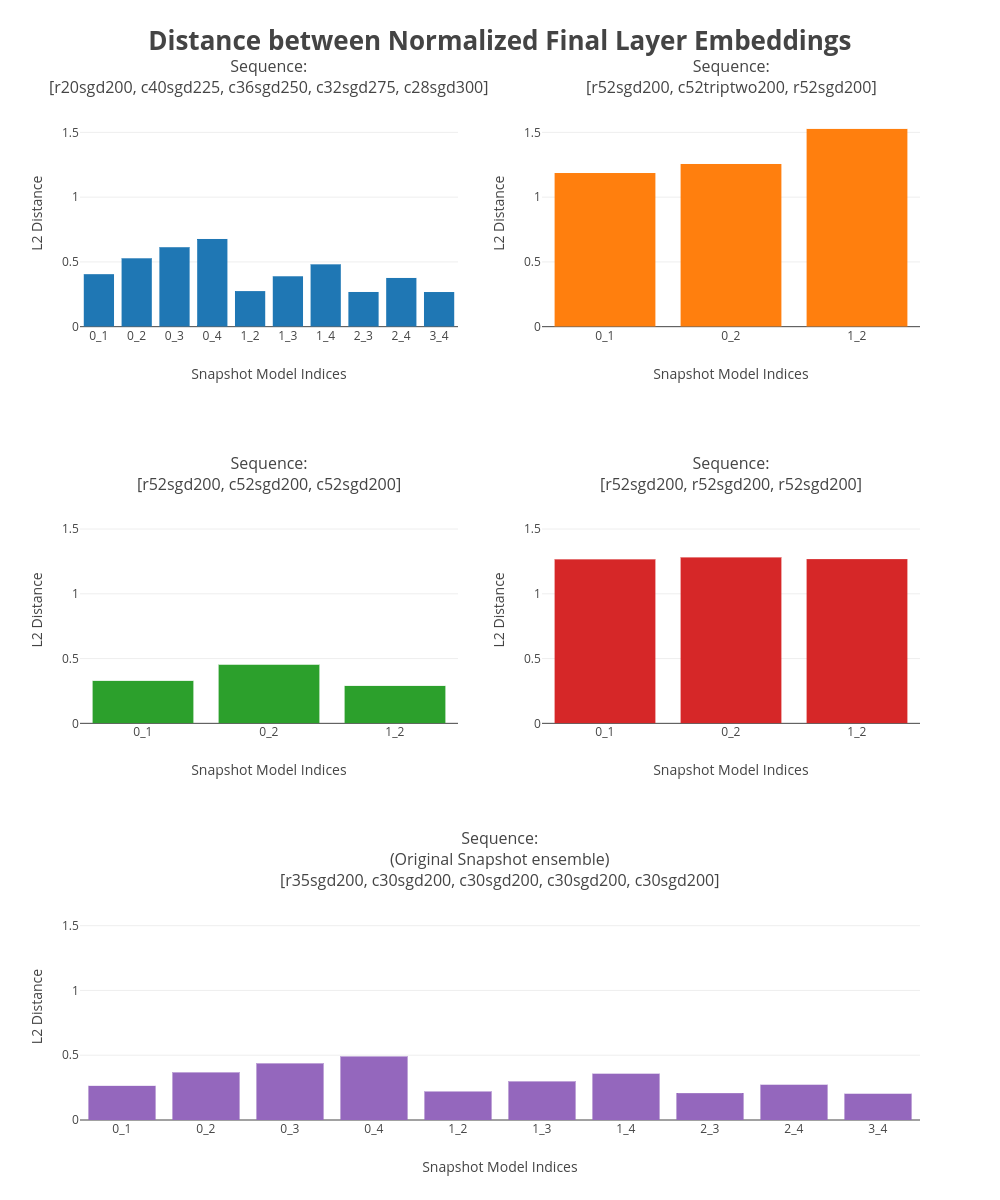

In [7]:
# DISTANCE PLOTS
# Annotations possible: 
#    Water Bar Chart - https://plot.ly/python/bar-charts/
import cPickle as pickle

base_dir = "./snap_final_evals/"
distance_files = [ "r20sgd200_c40sgd225_c36sgd250_c32sgd275_c28sgd300.5.l2_distances", 
                      "r52sgd200_c52triptwo200_r52sgd200.3.l2_distances",
                      "r52sgd200_c52sgd200_c52sgd200.3.l2_distances",
                      "r52sgd200_r52sgd200_r52sgd200.3.l2_distances",
                      "r35sgd200_c30sgd200_c30sgd200_c30sgd200_c30sgd200.5.l2_distances" ]


# Set rows and columns to that value
num_rows=3
num_cols=2

# Ensure number of filenames is a clean sqroot
total_graphs = num_rows * num_cols
assert len(distance_files) < total_graphs, ("Must provide %d filenames." % total_graphs)


# Set up grid
tmp_tup = ()
for filename in distance_files:  
    seq = filename.split('.')[0].split('_')
    seq_string = "[" + ', '.join(str(p) for p in seq) + "]"
    
    intro = "Sequence:<br>"
    if filename.startswith("r35sgd200_c30sgd200_c30sgd200_c30sgd200_c30sgd200"):
        intro += "(Original Snapshot ensemble)<br>"
        
    tmp_tup = tmp_tup + (intro + seq_string, )
    
fig = tools.make_subplots(rows=num_rows, cols=num_cols, 
                          subplot_titles=tmp_tup,
                          specs=[[{}, {}], [{}, {}], [{'colspan': 2}, None]])



# Create subsplots with distance values from each filename
for i, filename in enumerate(distance_files):
    eval_metrics = pickle.load(open(base_dir + filename, "rb"))
    
    labels=[]
    values=[]
    for cur_key in sorted(eval_metrics.iterkeys()):
        labels.append(cur_key)
        values.append(eval_metrics[cur_key])

    tmp_trace = go.Bar(x=labels, y=values)
    fig.append_trace(tmp_trace, 1 + (i // num_cols), 1 + (i % num_cols))
    
    fig['layout']['xaxis' + str(i + 1)].update(title='Snapshot Model Indices')
    fig['layout']['yaxis' + str(i + 1)].update(title='L2 Distance', range=[0, 1.75])
   

# Finalize layout
fig['layout'].update(title="<b>Distance between Normalized Final Layer Embeddings</b><br>")    
fig['layout'].update(titlefont=dict(size=26))
fig['layout'].update(showlegend=False)
fig['layout'].update(width=1000)
fig['layout'].update(height=1200)


# Show image
py.image.save_as(fig, filename='a-simple-plot.png')

from IPython.display import Image
Image('a-simple-plot.png')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]
[ (3,1) x5,y5           -      ]



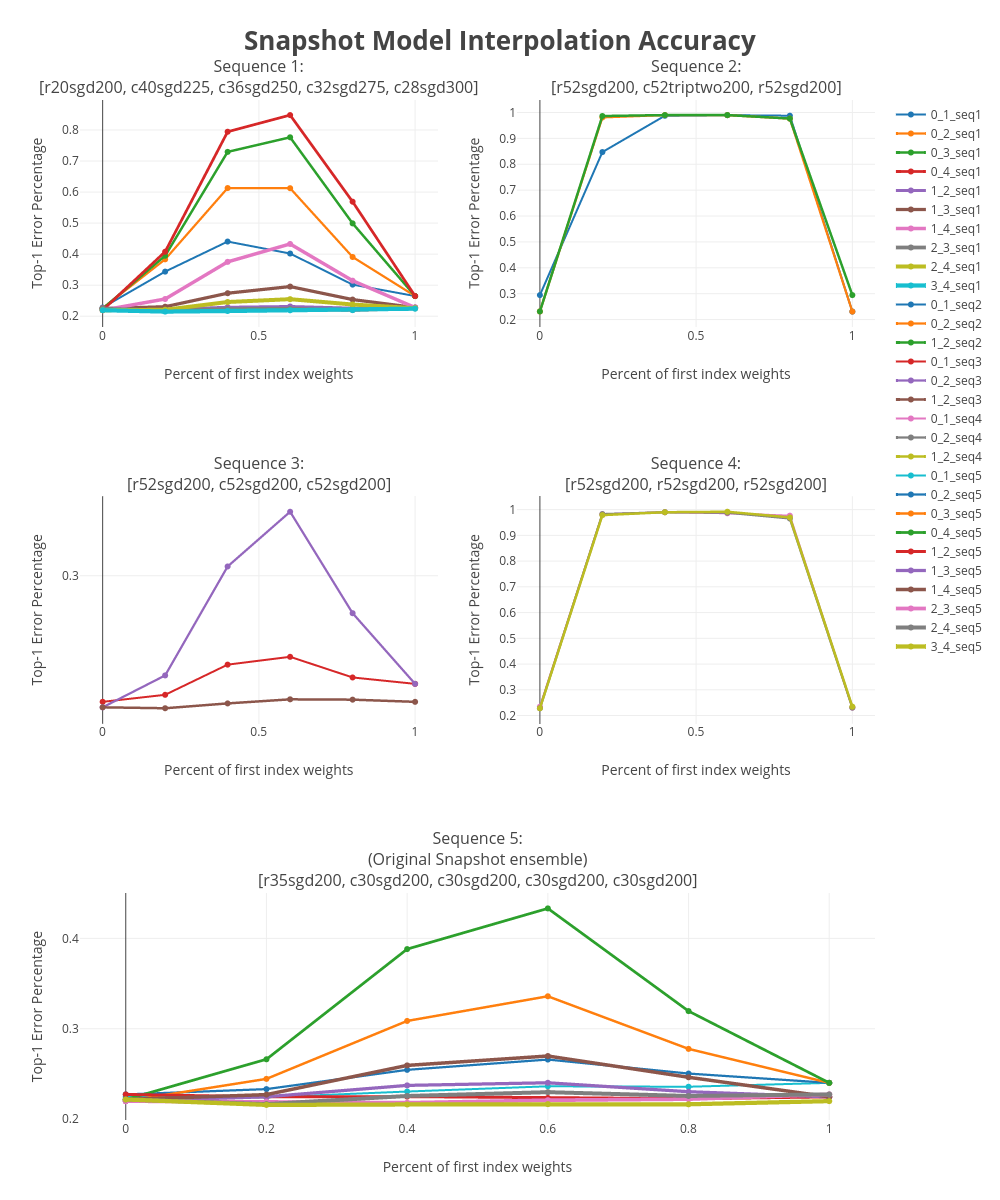

In [8]:
# INTERPOLATION
import cPickle as pickle

base_dir = "./snap_final_evals/"
interpol_files = [ "r20sgd200_c40sgd225_c36sgd250_c32sgd275_c28sgd300.5.interpolation", 
                      "r52sgd200_c52triptwo200_r52sgd200.3.interpolation",
                      "r52sgd200_c52sgd200_c52sgd200.3.interpolation",
                      "r52sgd200_r52sgd200_r52sgd200.3.interpolation",
                      "r35sgd200_c30sgd200_c30sgd200_c30sgd200_c30sgd200.5.interpolation" ]


# Set rows and columns to that value
num_rows=3
num_cols=2

# Ensure number of filenames is a clean sqroot
total_graphs = num_rows * num_cols
assert len(interpol_files) < total_graphs, ("Must provide %d filenames." % total_graphs)


# Set up grid
tmp_tup = ()
for i, filename in enumerate(interpol_files):  
    seq = filename.split('.')[0].split('_')
    seq_string = "[" + ', '.join(str(p) for p in seq) + "]"

    intro = "Sequence " + str(i + 1) + ":<br>"
    if filename.startswith("r35sgd200_c30sgd200_c30sgd200_c30sgd200_c30sgd200"):
        intro += "(Original Snapshot ensemble)<br>"

    tmp_tup = tmp_tup + (intro + seq_string, )
    
fig = tools.make_subplots(rows=num_rows, cols=num_cols, 
                          subplot_titles=tmp_tup,
                          specs=[[{}, {}], [{}, {}], [{'colspan': 2}, None]])
 
# Get interpolation percentages
eval_metrics = pickle.load(open(base_dir + interpol_files[0], "rb"))
x_values = []
for cur_key in sorted(eval_metrics.iterkeys()):
    if cur_key.startswith("0_1"):
        x_values.append(float(cur_key.split('_')[-1]))

# Get error percentages and plot them
num_per_trace=len(x_values)
tick_marks = [ round(val, 2) for val in list(np.arange(0.0, 1.1, 0.1)) ]

for j, filename in enumerate(interpol_files):
    traces=[]
    tmp_y_values=[]

    eval_metrics = pickle.load(open(base_dir + filename, "rb"))
    for i, cur_key in enumerate(sorted(eval_metrics.iterkeys())):
        tmp_y_values.append(1 - eval_metrics[cur_key][1])
    
        # Add scatter plot line
        if (i + 1) % num_per_trace == 0:
            index_combo_string = ("%s_%s_seq%d" % 
                                (cur_key.split('_')[0], cur_key.split('_')[1], 
                                (j + 1)))
        
            traces.append(go.Scatter(x = x_values,
                                    y = tmp_y_values,
                                    mode = 'lines+markers',
                                    name = index_combo_string,
                                    line=dict(width = 2 + 0.25 * (i // num_per_trace))))
            tmp_y_values=[]
    
    # Add traces
    for trace_i in traces:
        fig.append_trace(trace_i, 1 + (j // num_cols), 1 + (j % num_cols))
    
    fig['layout']['xaxis' + str(j + 1)].update(title='Percent of first index weights')
    fig['layout']['yaxis' + str(j + 1)].update(title='Top-1 Error Percentage', tickvals=tick_marks)

    
# Finalize layout
fig['layout'].update(title="<b>Snapshot Model Interpolation Accuracy</b><br>")    
fig['layout'].update(titlefont=dict(size=26))
fig['layout'].update(width=1000)
fig['layout'].update(height=1200)


# Show image
py.image.save_as(fig, filename='a-simple-plot.png')

from IPython.display import Image
Image('a-simple-plot.png')

In [47]:
# DISAGREE Heatmap/table
# https://plot.ly/python/table/
# https://plot.ly/python/heatmaps/

import cPickle as pickle

base_dir = "./snap_final_evals/"
disagree_files = [ "r20sgd200_c40sgd225_c36sgd250_c32sgd275_c28sgd300.5.disagree", 
                      "r52sgd200_c52triptwo200_r52sgd200.3.disagree",
                      "r52sgd200_c52sgd200_c52sgd200.3.disagree",
                      "r52sgd200_r52sgd200_r52sgd200.3.disagree",
                      "r35sgd200_c30sgd200_c30sgd200_c30sgd200_c30sgd200.5.disagree" ]

# Set rows and columns to that value
num_rows=3
num_cols=2

# Ensure number of filenames is a clean sqroot
total_graphs = num_rows * num_cols
assert len(disagree_files) < total_graphs, ("Must provide %d filenames." % total_graphs)


# Set up grid
tmp_tup = ()
for filename in disagree_files:  
    seq = filename.split('.')[0].split('_')
    seq_string = "[" + ', '.join(str(p) for p in seq) + "]"
    
    intro = "Sequence:<br>"
    if filename.startswith("r35sgd200_c30sgd200_c30sgd200_c30sgd200_c30sgd200"):
        intro += "(Original Snapshot ensemble)<br>"

    tmp_tup = tmp_tup + (intro + seq_string, )
        
fig = tools.make_subplots(rows=num_rows, cols=num_cols, 
                          subplot_titles=tmp_tup,
                         specs=[[{}, {}], [{}, {}], [{'colspan': 2}, None]])

# Create labels and corresponding values
for i, filename in enumerate(disagree_files):
    eval_metrics = pickle.load(open(base_dir + filename, "rb"))

    # Get underlying models strings
    key_values = [ 'Index 0' ]
    for cur_key in sorted(eval_metrics.iterkeys()):
        if cur_key.startswith("0_"):
            key_values.append('Index ' + cur_key.split('_')[-1])

    # Get corresponding values
    num_indices=len(key_values)
    tmp_values = np.ndarray(shape=(num_indices, num_indices))
    tmp_values[:] = -0.25

    for cur_key in sorted(eval_metrics.iterkeys()):
        x, y = cur_key.split('_')
        tmp_values[int(x), int(y)] = eval_metrics[cur_key][0]

    for m in range(num_indices):
        tmp_values[m, m] = 0.0

    # Set up subplot
    final_vals = [ list(l) for l in reversed(tmp_values) ]
    tmp_trace = go.Heatmap(z=final_vals,
                        x=key_values,
                        y=list(reversed(key_values)),
                        zmax=0.275, zmin=-0.275,
                        colorbar=dict(nticks=10, tickmode="array", tickvals=[-0.25, -0.1, 0, 0.1, 0.25]))
        
    fig.append_trace(tmp_trace, 1 + (i // num_cols), 1 + (i % num_cols))   
    if (i + 1) == len(disagree_files):
        fig['layout']['xaxis' + str(i + 1)].update(title='*Ignore negative values (colored blue)')

        
# Format layout	
fig['layout'].update(title="<b>Top-1 Prediction Disagreement Percentage (between Snapshot Models)</b><br>")    
fig['layout'].update(titlefont=dict(size=26))
fig['layout'].update(width=1000)
fig['layout'].update(height=1250)


#  Display it
py.iplot(fig, filename='labelled-heatmap')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]
[ (3,1) x5,y5           -      ]



In [56]:
# SHOW VALIDATION LOSS PLOT OF NORMAL MODEL TRAINING VS SNAPSHOT TRAINING
base_dir = "./snap_histories/"
baseline_filename = "normal_model.pickle"
snapshot_bases =  [ "r20sgd200_c40sgd225_c36sgd250_c32sgd275_c28sgd300", 
                      "r52sgd200_c52triptwo200_r52sgd200",
                      "r52sgd200_c52sgd200_c52sgd200",
                      "r52sgd200_r52sgd200_r52sgd200",
                      "r35sgd200_c30sgd200_c30sgd200_c30sgd200_c30sgd200" ]

traces = []


# Get main training history
normal_model_history = pickle.load(open(base_dir + baseline_filename, "rb"))
valid_loss = normal_model_history['val_loss']

traces.append(go.Scatter(y = valid_loss,
                   mode = 'lines',
                   name = "Normal Training"))


# Get remaining snapshots to overlay on top of normal model
for snap_base in snapshot_bases:
    snap_total_history = []
    for i in range(len(snap_base.split("_"))):
        snap_filename = snap_base + "." + str(i) + ".pickle" 
        snap_model_history = pickle.load(open(base_dir + snap_filename, "rb"))

        valid_loss = snap_model_history['val_loss']
        snap_total_history.extend(valid_loss)

    traces.append(go.Scatter(y = snap_total_history, 
                   mode = 'lines',
                   name = snap_base))


# Set up layout
layout = go.Layout(title=("<b>Validation Loss History</b><br>" + 
                           "Normal Model vs. Best Sequences"), 
                    titlefont=dict(size=20),
                    xaxis=dict(title='Epochs', range=[0,155]),
                    yaxis=dict(title='Loss value', range=[1,6]), 
                    width=1100, height=700)

# Display Figure                  
fig = dict(data=traces, layout=layout)
py.iplot(fig, filename='customizing-subplot-axes')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



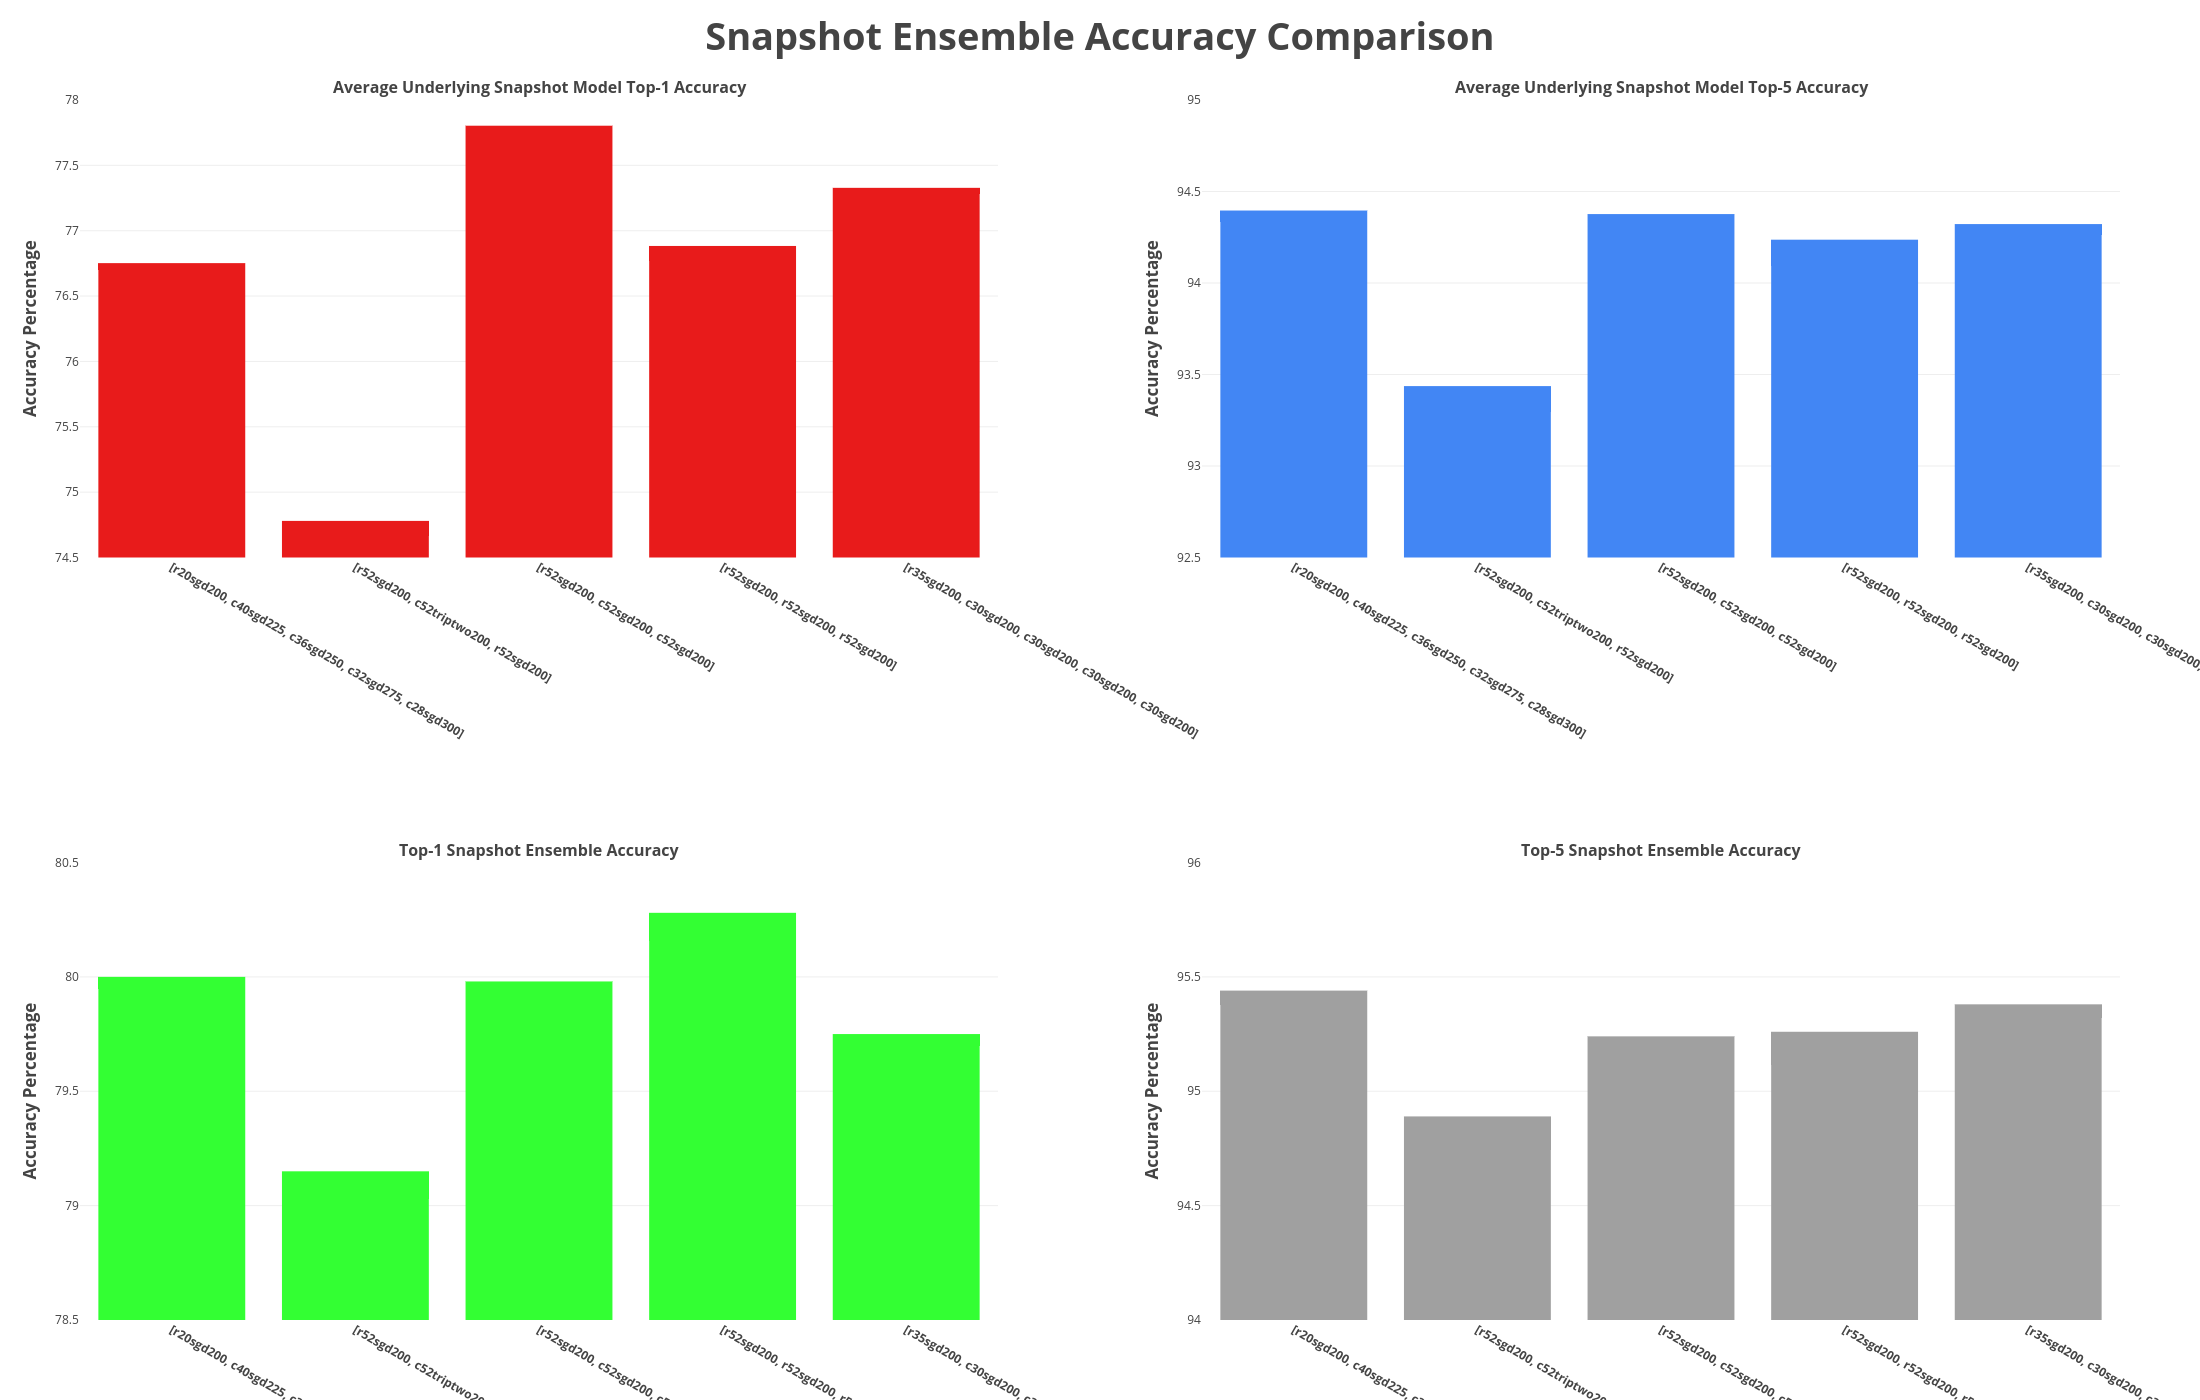

In [57]:
import cPickle as pickle


# Get final info
base_dir = "./snap_final_evals/"
eval_files = [ "r20sgd200_c40sgd225_c36sgd250_c32sgd275_c28sgd300.5.eval", 
                      "r52sgd200_c52triptwo200_r52sgd200.3.eval",
                      "r52sgd200_c52sgd200_c52sgd200.3.eval",
                      "r52sgd200_r52sgd200_r52sgd200.3.eval",
                      "r35sgd200_c30sgd200_c30sgd200_c30sgd200_c30sgd200.5.eval" ]

val_index_mapping = [1, 2, 4, 5] 

# Set rows and columns to that value
num_rows=2
num_cols=2

colors = [ (232, 27, 27), (66, 134, 244),
           (51, 255, 51), (160, 160, 160) ]


# Set up grid and names
tmp_tup = ("<b>Average Underlying Snapshot Model Top-1 Accuracy</b>", 
           "<b>Average Underlying Snapshot Model Top-5 Accuracy</b>",
            "<b>Top-1 Snapshot Ensemble Accuracy</b>", 
            "<b>Top-5 Snapshot Ensemble Accuracy</b>")

# Get sequence names
seq_string_list = []
for filename in eval_files:
    seq = filename.split('.')[0].split('_')
    seq_string = "<b>[" + ', '.join(str(p) for p in seq) + "]</b>"
    seq_string_list.append(seq_string)

fig = tools.make_subplots(rows=num_rows, cols=num_cols, 
                          subplot_titles=tmp_tup)

# Create subplots with accuracy values for each sequence
for i in range(len(tmp_tup)):   
    values = [] 
    for filename in eval_files:    
        eval_metrics = pickle.load(open(base_dir + filename, "rb"))
        values.append(eval_metrics[val_index_mapping[i]] * 100)

    tmp_trace = go.Bar(x=seq_string_list, y=values, marker=dict(color='rgb' + str(colors[i])))
    fig.append_trace(tmp_trace, 1 + (i // num_cols), 1 + (i % num_cols))
    
    if i == 0: 
        range_val = [74.5, 78]
    elif i == 1:
        range_val = [92.5, 95]
    elif i == 2:
        range_val = [78.5, 80.5]
    else:
        range_val = [94, 96]
        
    fig['layout']['yaxis' + str(i + 1)].update(title='<b>Accuracy Percentage</b>', titlefont=dict(size=17), range=range_val)
    

# Format everything
fig['layout'].update(title="<b>Snapshot Ensemble Accuracy Comparison</b><br><br>")
fig['layout'].update(titlefont=dict(size=38))
fig['layout'].update(showlegend=False)
fig['layout'].update(width=2200)
fig['layout'].update(height=1400)


# Display it
py.image.save_as(fig, filename='a-simple-plot.png')

from IPython.display import Image
Image('a-simple-plot.png')

Using TensorFlow backend.



Color channel 0
Mean:  129.30
Median:  126.00
Std:  68.17


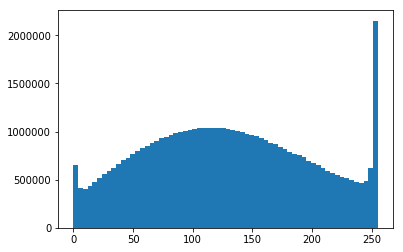


Color channel 1
Mean:  124.07
Median:  120.00
Std:  65.39


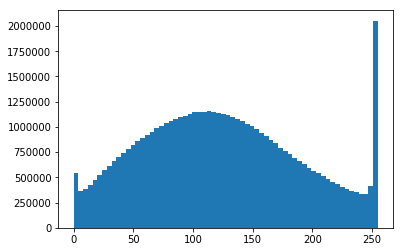


Color channel 2
Mean:  112.43
Median:  101.00
Std:  70.42


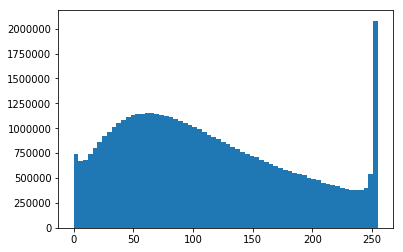


After normalization...
Training set
Mean:  -0.00
Median:  -0.05
Std:  0.53


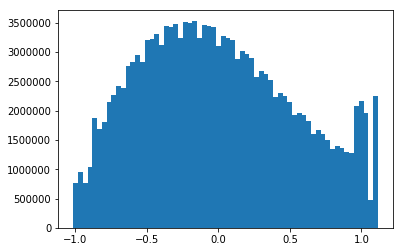

Test set
Mean:  -0.00
Median:  -0.05
Std:  0.53


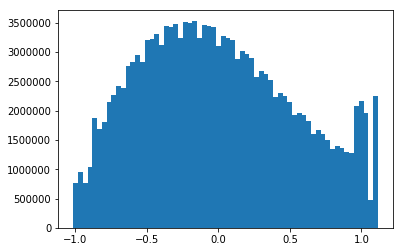

In [1]:
from keras.datasets import cifar100

import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar100.load_data()


# Metrics and histogram
x_train = x_train.astype('float32')
x_test = x_train.astype('float32')

for i in range(3):
    print("\nColor channel %d" % i)
    print("Mean:  %.2f" % np.mean(x_train[:, :, :, i]))
    print("Median:  %.2f" % np.median(x_train[:, :, :, i]))
    print("Std:  %.2f" % np.std(x_train[:, :, :, i]))
    
    plt.hist(x_train[:, :, :, i].flatten(), bins=64)
    plt.show()
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
    mean_val = np.mean(x_train[:, :, :, i])
    x_train[:, :, :, i] -= mean_val
    x_train[:, :, :, i] /= 128
    x_test[:, :, :, i] -= mean_val
    x_test[:, :, :, i] /= 128    


print("\nAfter normalization...\n")

print("Training set")
print("Mean:  %.2f" % np.mean(x_train))
print("Median:  %.2f" % np.median(x_train))
print("Std:  %.2f" % np.std(x_train))

plt.hist(x_train.flatten(), bins=64)
plt.show()

print("Test set")
print("Mean:  %.2f" % np.mean(x_test))
print("Median:  %.2f" % np.median(x_test))
print("Std:  %.2f" % np.std(x_test))

plt.hist(x_test.flatten(), bins=64)
plt.show()